### DESCRIPTORES DE MERCADO POR SEGMENTO
**ANALISIS DE TRANSACCIONES E INFRAESTRUCTURAS POR SEGMENTO DE MERCADO**

_By Diego Tondo, August 2020_

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)

In [3]:
dft = pd.read_csv('../dataset/data_csv/sis_transa_201801_202007_merged.csv.zip', 
                 parse_dates=['fecha'], 
                 compression='zip')
dft.shape

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,7,8,20,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2990501, 47)

In [4]:
dft['id_empresa'] = dft['id_empresa'].astype('int')
dft = dft[(dft['segmento']!='d')]
dft.shape

(2901690, 47)

In [5]:
dft.columns

Index(['baja_x', 'cantidad', 'codigo_error', 'departamento', 'fecha',
       'fecha_stop', 'geo_latitud', 'geo_longitud', 'geo_status', 'hora',
       'hora_stop', 'id_bomba', 'id_equipo', 'id_tanque', 'id_transaccion',
       'id_usuario', 'id_vehiculo', 'producto', 'pump_site_id', 'sync',
       'tank_site_id', 'temp_start', 'temp_stop', 'user_site_id',
       'veh_site_id', 'veh_tag_id', 'volume_start', 'volume_stop',
       'id_empresa', 'descripcion', 'ultima_fecha', 'ultima_fecha_h',
       'firmware_version', 'baja_x.1', 'ultima_fecha_sync_db',
       'current_firmware', 'ultima_sincronizacion', 'ultima_conexion',
       'delay_ue', 'geo_latitude', 'geo_longitude', 'id_canal', 'empresa',
       'baja_y', 'segmento', 'baja_y.1', 'main_id'],
      dtype='object')

In [6]:
dft18 = dft[ (dft['fecha']<'2019-01-01') ]
dft19 = dft[ (dft['fecha']<'2020-01-01') & (dft['fecha']>='2019-01-01') ]
dft20 = dft[ (dft['fecha']>='2020-01-01') ]

In [7]:
dft18.shape, dft19.shape, dft20.shape

((1001236, 47), (1272986, 47), (627468, 47))

#### DESCRIPTORES GENERALES DE MERCADO

In [13]:
## CANTIDAD DE EMPRESAS POR AÑO
qemp = np.asarray([dft18['id_empresa'].nunique(), dft19['id_empresa'].nunique(), dft20['id_empresa'].nunique()])
print(qemp)

[196 221 207]


In [14]:
## CANTIDAD DE EMPRESAS POR AÑO
scant = np.asarray([dft18['cantidad'].sum(), dft19['cantidad'].sum(), dft20['cantidad'].sum()])
print(f'Litros controlados por año: {scant}')

Litros controlados por año: [1.38e+08 1.83e+08 9.00e+07]


In [15]:
print(f'Litros controlados en 20 respecto de 19: %{scant[2]/scant[1]*100}')

Litros controlados en 20 respecto de 19: %49.23042487833016


In [16]:
print(f'Litros controlados por empresa: {scant/qemp}')

Litros controlados por empresa: [702839.62 827019.37 434681.54]


In [17]:
print(f'Litros controlados por empresa por mes: {scant/qemp/12}')

Litros controlados por empresa por mes: [58569.97 68918.28 36223.46]


In [18]:
## CANTIDAD DE SITIOS POR EMPRESA
qsites = np.asarray([dft18['id_equipo'].nunique(), dft19['id_equipo'].nunique(), dft20['id_equipo'].nunique()])
qsites

array([252, 375, 295])

In [19]:
print(f'Sitios controlados por empresa: {qsites/qemp}')

Sitios controlados por empresa: [1.29 1.7  1.43]


In [20]:
qtanks = np.asarray([dft18['id_tanque'].nunique(), dft19['id_tanque'].nunique(), dft20['id_tanque'].nunique()])
qtanks

array([326, 538, 371])

In [21]:
print(f'Tanques controlados por empresa: {qtanks/qemp}')

Tanques controlados por empresa: [1.66 2.43 1.79]


In [22]:
print(f'Tanques controlados por sitio: {qtanks/qsites}')

Tanques controlados por sitio: [1.29 1.43 1.26]


#### DESCRIPTORES DE TRANSACCIONES POR SEGMENTO DE MERCADO

In [33]:
def TransactionsGroupedBySegment(df):
    dfg = df.groupby(['segmento'])['cantidad'].describe()
    dfg['count %'] = dfg['count']/dfg['count'].sum()*100
    dfg = dfg.transpose()
    return dfg

In [34]:
for i in (18, 19, 20):
    vars()[f'dft{i}_s_qtran'] = TransactionsGroupedBySegment(eval(f'dft{i}'))

In [35]:
dft19_s_qtran

segmento,a,c,e,i,m,o,s,t
count,108387.00,100952.00,454710.00,76372.00,29444.00,134016.00,7487.00,361618.00
mean,187.46,213.74,22.53,110.02,284.09,281.04,91.75,208.81
std,421.50,686.27,65.13,169.06,520.00,842.39,105.81,237.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,51.62,50.13,2.49,43.35,41.36,38.38,22.95,66.24
50%,100.16,97.06,7.83,62.27,150.21,65.56,69.65,133.02
75%,201.10,183.55,17.81,112.62,372.70,200.10,124.62,279.14
max,9999.26,100000.00,9997.90,5000.54,10002.22,36871.30,1148.18,13502.57
count %,8.51,7.93,35.72,6.00,2.31,10.53,0.59,28.41


In [26]:
dft18_s_qtran

segmento,a,c,e,i,m,o,t
count,53230.00,91715.00,394633.00,38174.00,10010.00,81293.00,332181.00
mean,162.00,191.35,19.96,128.04,242.28,338.88,207.25
std,261.76,430.03,197.21,189.73,229.94,1252.23,264.08
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50.01,50.01,2.58,44.30,66.47,37.57,63.32
50%,93.13,95.53,7.13,67.06,183.35,51.67,125.02
75%,200.22,182.10,15.04,120.22,317.17,146.12,256.02
max,9999.25,8000.01,29063.78,4000.00,1200.20,100000.00,15039.84
count %,5.32,9.16,39.41,3.81,1.00,8.12,33.18


In [36]:
dft19_s_qtran

segmento,a,c,e,i,m,o,s,t
count,108387.00,100952.00,454710.00,76372.00,29444.00,134016.00,7487.00,361618.00
mean,187.46,213.74,22.53,110.02,284.09,281.04,91.75,208.81
std,421.50,686.27,65.13,169.06,520.00,842.39,105.81,237.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,51.62,50.13,2.49,43.35,41.36,38.38,22.95,66.24
50%,100.16,97.06,7.83,62.27,150.21,65.56,69.65,133.02
75%,201.10,183.55,17.81,112.62,372.70,200.10,124.62,279.14
max,9999.26,100000.00,9997.90,5000.54,10002.22,36871.30,1148.18,13502.57
count %,8.51,7.93,35.72,6.00,2.31,10.53,0.59,28.41


In [37]:
dft20_s_qtran

segmento,a,c,e,i,m,o,t
count,73266.00,50668.00,214968.00,61803.00,12915.00,56288.00,157560.00
mean,201.91,189.11,26.15,140.56,370.50,177.62,231.73
std,506.03,917.49,94.03,209.57,741.53,623.50,240.45
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,42.70,48.35,2.48,50.57,39.60,37.00,71.14
50%,100.03,86.59,7.76,81.11,139.70,60.00,161.82
75%,200.29,168.90,16.76,145.00,509.50,116.60,335.53
max,10021.50,74476.19,11924.48,4994.20,12843.69,19216.64,6999.02
count %,11.68,8.07,34.26,9.85,2.06,8.97,25.11


In [70]:
## SAVE DATA TO CSV
#[eval(f'dft{i}_s_qtran').to_csv(f'../results/dft{i}_s_qtran.csv') for i in (18, 19, 20)]

**BOXPLOT**

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
sns.set_style("whitegrid", {"grid.color": ".9"})

In [32]:
segList = ['Agriculture', 'Construction', 'Service Stations', 'Industry', 'Mining',  'Oil&Gas', 'Telcos', 'Transportation']

In [33]:
dft19 = dft19.sort_values(by=['segmento'])

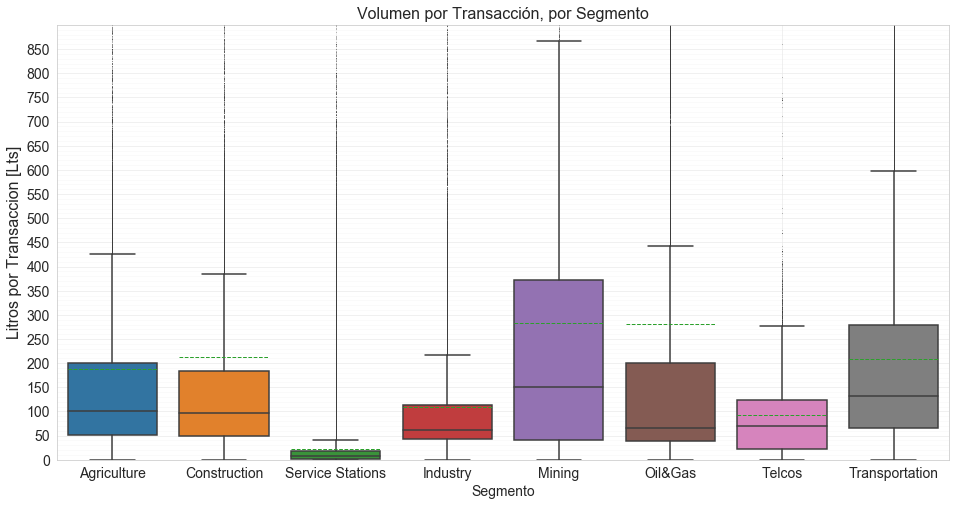

In [34]:
fig = plt.figure(figsize=(16,8))

ax = sns.boxplot(data=dft19, x='segmento', y='cantidad', showmeans=True, meanline=True, 
                 flierprops = dict(markerfacecolor='0.5', markersize=0.1, linestyle='none'))

plt.title("Volumen por Transacción, por Segmento",fontsize=16)
plt.ylabel('Litros por Transaccion [Lts]',fontsize=16)
plt.xlabel('Segmento', fontsize=14)

major_ticks = np.arange(0, 900, 50)
minor_ticks = np.arange(0, 900, 10)

plt.grid(True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
#plt.xticks(fontsize=16)
plt.xticks(np.arange(8), segList, fontsize=14, rotation=0)
plt.yticks(fontsize=14)

plt.ylim(0, 900)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.75)

#sns.despine()
plt.show()

In [35]:
#fig.savefig('../results/boxplot_volxtransaxseg.png', bbox_inches = 'tight')

#### CONSUMO POR EMPRESA

In [57]:
def TransactionsGroupedBySegAndCompany(dft):
    dft_cons = dft.groupby(['segmento','id_empresa'])['cantidad'].sum()
    ctot = dft_cons.sum()
    dft_s_vtran = dft_cons.groupby('segmento').describe()
    etot = dft19['id_empresa'].nunique()
    dft_s_vtran['count %'] = dft_s_vtran['count']/etot*100 
    dft_s_vtran['mean monthly'] = dft_s_vtran['mean']/12
    dft_s_vtran['vol'] = dft_cons.groupby('segmento').sum()
    dft_s_vtran['vol %'] = dft_s_vtran['vol']/ctot*100
    dft_s_vtran['vol per comp'] = dft_s_vtran['vol']/dft_s_vtran['count']
    dft_s_vtran['vol monthly'] = dft_s_vtran['vol']/12
    dft_s_vtran = dft_s_vtran.transpose()
    return (dft_s_vtran, dft_cons)

In [63]:
for i in 18, 19, 20:
    vars()[f'dft{i}_s_vtran'], vars()[f'dft{i}_cons'] = TransactionsGroupedBySegAndCompany(eval(f'dft{i}'))

In [67]:
dft18_s_vtran

segmento,a,c,e,i,m,o,t
count,3.50e+01,3.30e+01,7.00e+00,1.80e+01,5.00e+00,2.00e+01,7.80e+01
mean,2.46e+05,5.32e+05,1.13e+06,2.72e+05,4.85e+05,1.38e+06,8.83e+05
std,2.14e+05,7.07e+05,1.12e+06,3.04e+05,5.21e+05,4.53e+06,1.52e+06
min,1.25e+02,1.51e+02,0.00e+00,1.66e+02,2.26e+02,0.00e+00,0.00e+00
25%,6.67e+04,5.91e+04,2.84e+05,8.08e+04,9.23e+04,4.20e+04,2.15e+05
50%,2.09e+05,2.31e+05,1.02e+06,2.33e+05,4.14e+05,1.84e+05,4.13e+05
75%,3.55e+05,7.94e+05,1.58e+06,3.15e+05,6.12e+05,7.76e+05,1.06e+06
max,6.90e+05,3.25e+06,3.13e+06,1.16e+06,1.31e+06,2.06e+07,1.00e+07
count %,1.58e+01,1.49e+01,3.17e+00,8.14e+00,2.26e+00,9.05e+00,3.53e+01
mean monthly,2.05e+04,4.43e+04,9.38e+04,2.26e+04,4.04e+04,1.15e+05,7.36e+04


In [68]:
dft19_s_vtran

segmento,a,c,e,i,m,o,s,t
count,4.10e+01,3.30e+01,6.00e+00,2.30e+01,9.00e+00,3.00e+01,1.00,7.80e+01
mean,4.96e+05,6.54e+05,1.71e+06,3.65e+05,9.29e+05,1.26e+06,686937.36,9.68e+05
std,7.53e+05,8.57e+05,1.67e+06,4.78e+05,1.58e+06,3.85e+06,NaN,1.47e+06
min,1.36e+02,9.95e+02,6.17e+04,5.45e+02,0.00e+00,0.00e+00,686937.36,0.00e+00
25%,6.66e+04,6.09e+04,2.66e+05,3.82e+04,2.07e+04,8.72e+04,686937.36,1.85e+05
50%,3.00e+05,3.32e+05,1.62e+06,2.29e+05,4.39e+05,3.75e+05,686937.36,4.19e+05
75%,6.02e+05,8.23e+05,2.94e+06,4.98e+05,1.06e+06,8.09e+05,686937.36,1.17e+06
max,4.29e+06,3.44e+06,3.76e+06,1.77e+06,4.99e+06,2.12e+07,686937.36,8.85e+06
count %,1.86e+01,1.49e+01,2.71e+00,1.04e+01,4.07e+00,1.36e+01,0.45,3.53e+01
mean monthly,4.13e+04,5.45e+04,1.42e+05,3.04e+04,7.75e+04,1.05e+05,57244.78,8.07e+04


In [69]:
dft20_s_vtran

segmento,a,c,e,i,m,o,t
count,4.00e+01,3.30e+01,6.00e+00,2.20e+01,8.00e+00,2.50e+01,7.30e+01
mean,3.70e+05,2.90e+05,9.37e+05,3.95e+05,5.98e+05,4.00e+05,5.00e+05
std,6.09e+05,4.70e+05,9.20e+05,1.06e+06,9.72e+05,5.54e+05,6.23e+05
min,1.19e+03,0.00e+00,1.13e+05,6.70e+01,1.57e+04,2.37e+00,2.27e+00
25%,7.38e+04,5.74e+04,1.70e+05,3.15e+04,7.95e+04,5.43e+04,1.16e+05
50%,1.84e+05,1.40e+05,7.04e+05,9.07e+04,1.77e+05,2.02e+05,2.61e+05
75%,3.76e+05,3.23e+05,1.55e+06,2.16e+05,5.12e+05,5.23e+05,6.18e+05
max,2.73e+06,2.31e+06,2.27e+06,5.02e+06,2.82e+06,2.45e+06,3.52e+06
count %,1.81e+01,1.49e+01,2.71e+00,9.95e+00,3.62e+00,1.13e+01,3.30e+01
mean monthly,3.08e+04,2.42e+04,7.81e+04,3.29e+04,4.98e+04,3.33e+04,4.17e+04


In [71]:
## SAVE DATA TO CSV
[eval(f'dft{i}_s_vtran').to_csv(f'../results/dft{i}_s_vtran.csv') for i in (18, 19, 20)]

[None, None, None]

**BOXPLOT**

In [42]:
dfc = dft19_cons.reset_index()

In [43]:
dfc['cantidad m'] = dfc['cantidad']/12

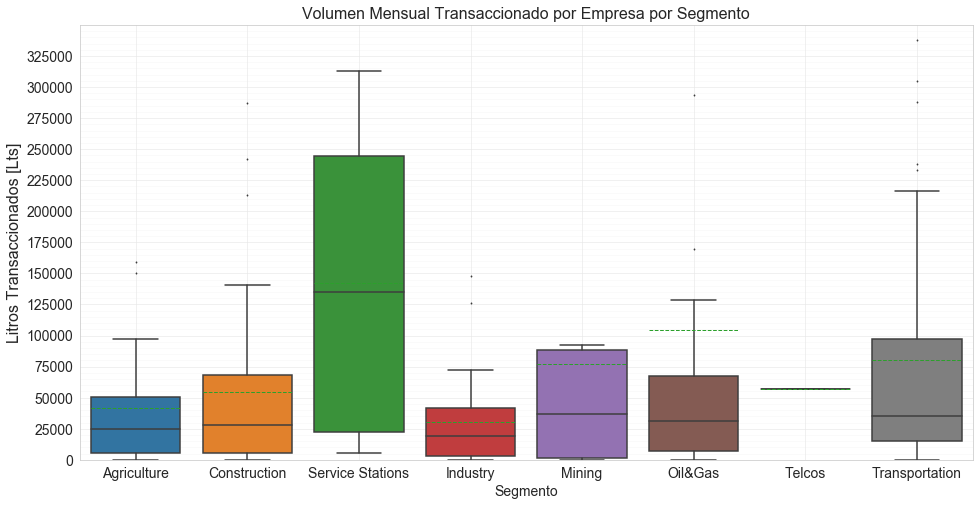

In [44]:
fig = plt.figure(figsize=(16,8))

ax = sns.boxplot(data=dfc, x='segmento', y='cantidad m', showmeans=True, meanline=True, 
                 flierprops = dict(markerfacecolor='0.5', markersize=1, linestyle='none'))

plt.title("Volumen Mensual Transaccionado por Empresa por Segmento",fontsize=16)
plt.ylabel('Litros Transaccionados [Lts]',fontsize=16)
plt.xlabel('Segmento', fontsize=14)

major_ticks = np.arange(0, 350000, 25000)
minor_ticks = np.arange(0, 350000, 5000)
plt.ylim(0, 350000)

plt.grid(True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.xticks(fontsize=16)
plt.xticks(np.arange(8), segList, fontsize=14, rotation=0)
plt.yticks(fontsize=14)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.75)

#sns.despine()
plt.show()

In [45]:
#fig.savefig('../results/boxplot_volxempresaxseg.png', bbox_inches = 'tight')

#### ANALISIS DE INFRAESTRUCTURAS POR SEGMENTO

In [115]:
def infra(df):
    df_infra = df.groupby(['segmento','id_empresa'])['id_equipo', 'id_tanque', 'main_id'].nunique()
    df_infra = df_infra.groupby('segmento').mean().transpose()
    return df_infra

In [116]:
for i in 18, 19, 20:
    vars()[f'dft{i}_infra'] = infra(eval(f'dft{i}'))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [119]:
dft20_infra, dft19_infra, dft18_infra

(segmento       a      c      e      i      m      o      t
 id_equipo   1.52   1.64   1.33   1.23   1.25   1.72   1.26
 id_tanque   1.73   1.88   2.50   1.41   3.50   1.92   1.64
 main_id    39.55  59.06  26.67  28.27  19.75  66.92  45.75,
 segmento       a      c      e      i      m      o      s      t
 id_equipo   1.46   1.88   1.50   1.26   1.22   1.70   49.0   1.33
 id_tanque   1.76   2.30   3.00   1.57   3.44   2.37  111.0   1.72
 main_id    39.22  58.45  30.17  27.65  19.56  65.80    1.0  50.38,
 segmento       a      c      e      i     m      o      t
 id_equipo   1.11   1.39   1.43   1.06   1.0   1.65   1.28
 id_tanque   1.37   1.76   3.43   1.22   1.4   2.60   1.73
 main_id    30.54  47.94  25.29  31.78  16.6  50.50  50.29)

In [48]:
## SAVE DATA TO CSV
#dft_infra19.to_csv('../results/dft19_infra.csv')

#### Distribuciones por Segmento

In [106]:
for y in (18, 19, 20):
    df = eval(f'dft{y}')
    for i in df['segmento'].unique():
        vars()[f'{i}{y}'] = df[df['segmento'].str.contains(str(i), regex=True)].groupby('id_empresa')['cantidad'].sum()/12
        vars()[f'{i}{y}'] = vars()[f'{i}{y}'].reset_index()
        vars()[f'{i}{y}'].name = f'{i}{y}'

In [110]:
def histograma(df):
    fig = plt.figure(figsize=(16,8))
    
    sns.distplot(df['cantidad'], bins=30)
    
    plt.title(f'Histograma de Empresas tipo {df.name} por Volumen Mensual',fontsize=16)
    plt.ylabel('Empresas',fontsize=16)
    plt.xlabel('Litros [Lts]', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    
    #plt.ylim(0, 50)
    plt.xlim(0, 200000)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)
    
    plt.show()

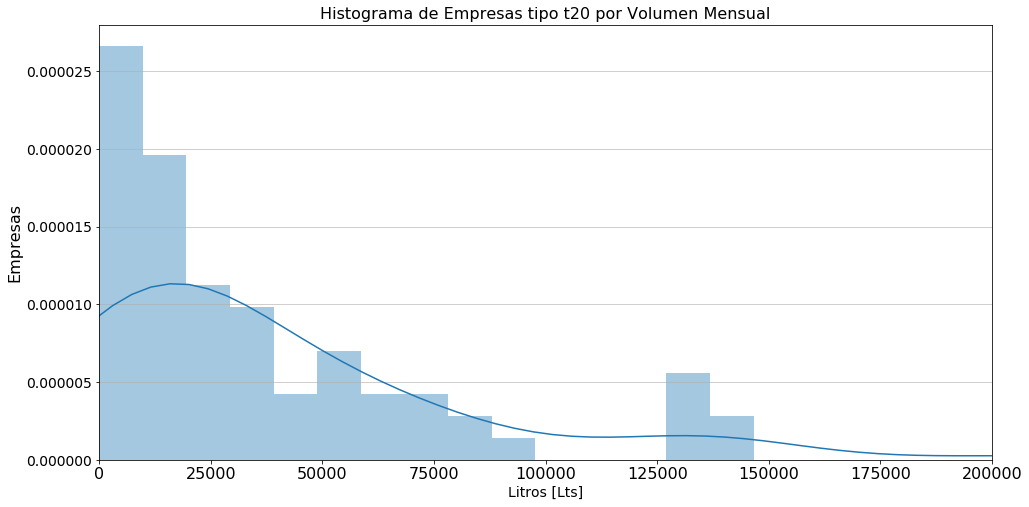

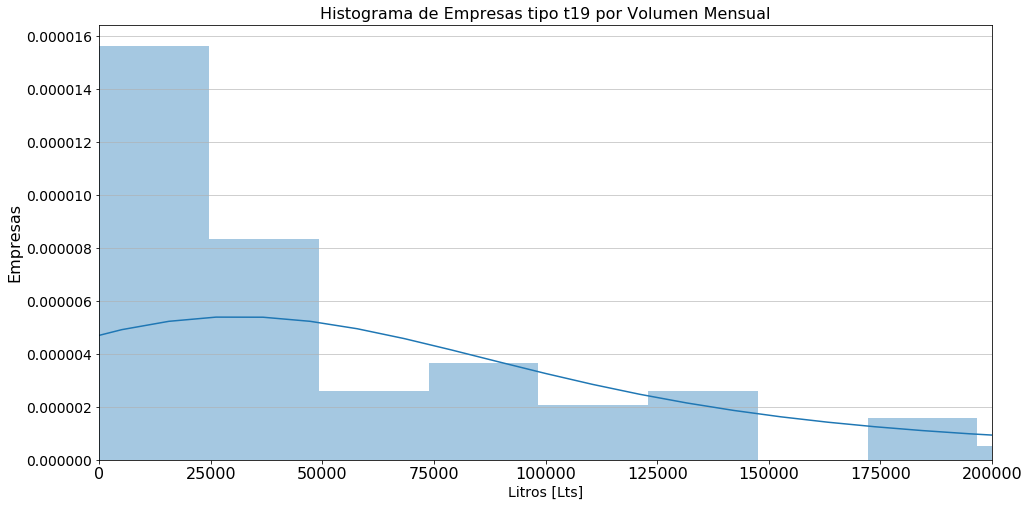

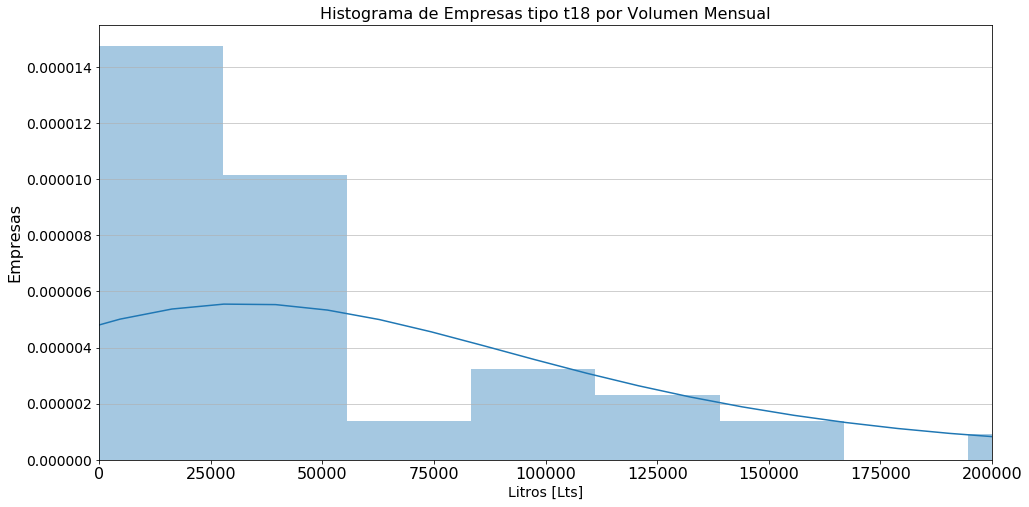

(None, None, None)

In [113]:
histograma(t20), histograma(t19), histograma(t18)

In [52]:
#fig.savefig('../results/hist_t19.png', bbox_inches = 'tight')

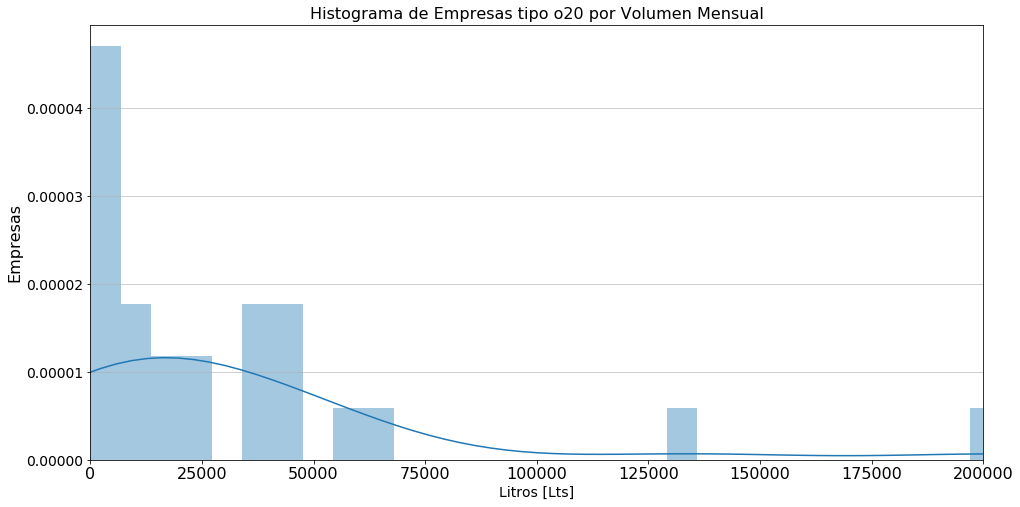

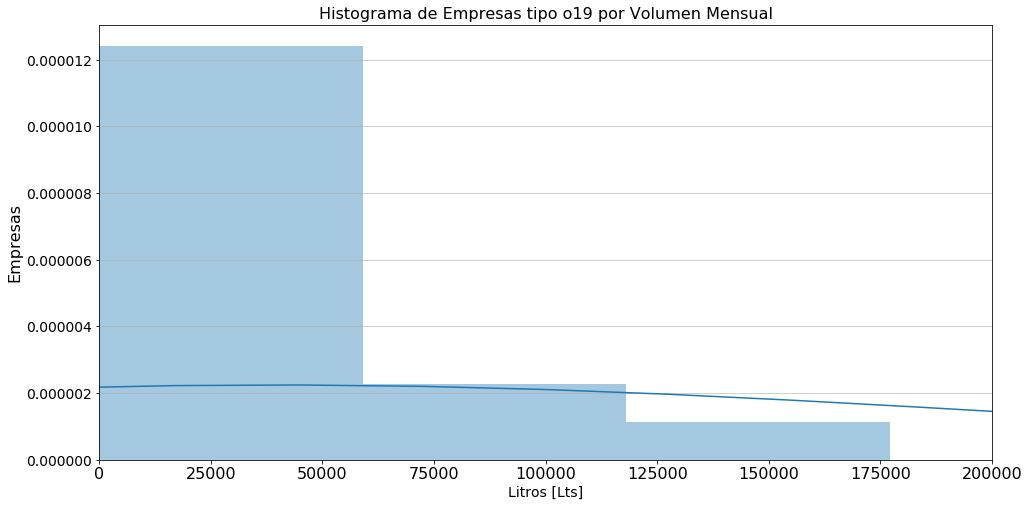

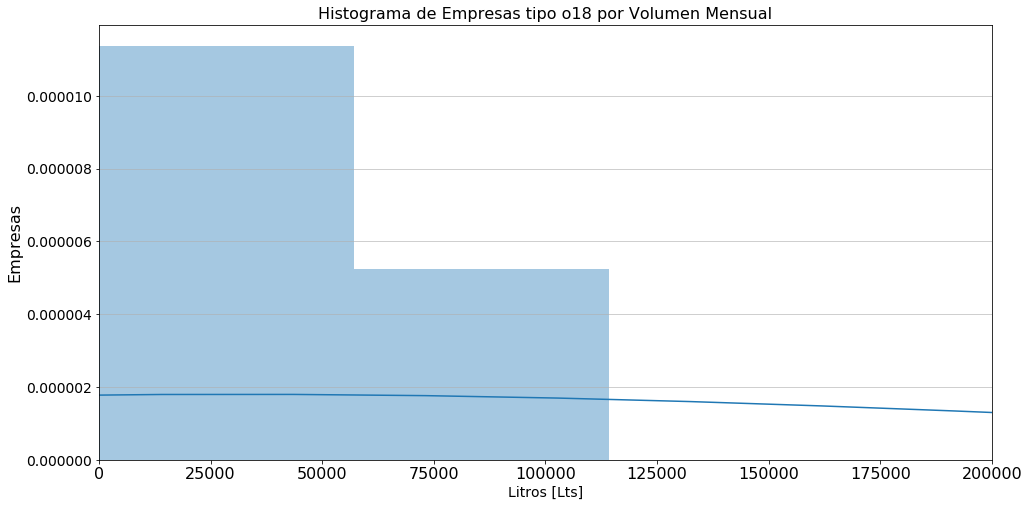

(None, None, None)

In [114]:
histograma(o20), histograma(o19), histograma(o18)